In [2]:
import numpy as np
import pandas as pd

from ipywidgets import interact

import matplotlib.pyplot as plt

%matplotlib inline

# Import the raw data

In [69]:
df = pd.read_csv('data/data.csv', parse_dates=True, infer_datetime_format=True)

In [70]:
def calculate_S1(row):
    if row.index == 0:
        return t1_init
    else:
        return 0
    
def calculate_Q1(row):
    q = a1 * (row['S1 (mm)'] - h1)**m1
    if q > 0:
        return q
    else:
        return 0

def initialize_df(df):
    # initialize the columns
    df['S1 (mm)'] = np.nan
    df.loc[0, 'S1 (mm)'] = t1_init
    df['Q1 (mm/h)'] = np.nan
    df['Q12 (mm/h)'] = np.nan
    df['S2 (mm)'] = np.nan
    df.loc[0, 'S2 (mm)'] = t2_init
    df['Q2 (mm/h)'] = np.nan
    df['Q1+Q2 (mm/h)'] = np.nan
    return df


## set initial parameters

In [89]:
# Tank 1:
a1 = 0.02
m1 = 1.5
h1 = 1.8

a12 = 0.021
m12 = 1.
h12 = 0.

t1_init = 1.0 # mm initial something

# Tank 2:
a2 = 0.02
m2 = 1.3
h2 = 0.

t2_init = 1.0

### Interactive Inputs

In [72]:
def update():
    df = initialize_df(df)

    for i in range(len(df)):
        if i == 0:
            this_s1 = t1_init
            this_s2 = t2_init

        else:
            q1_balance = (df.loc[i, 'Rain (mm/h)'] - df.loc[i, 'Evap (mm/h)'] - df.loc[i - 1, 'Q1 (mm/h)'] - df.loc[i - 1, 'Q12 (mm/h)'])/3
            this_s1 = max(0, df.loc[i - 1, 'S1 (mm)'] + q1_balance)

            delta_q2 = df.loc[i - 1, 'S2 (mm)'] + (df.loc[i - 1, 'Q12 (mm/h)'] - df.loc[i - 1, 'Q2 (mm/h)'])/3
            this_s2 = max(0, delta_q2)

        df.loc[i, 'S1 (mm)'] = this_s1
        df.loc[i, 'S2 (mm)'] = this_s2

        if this_s1 > h1:
            df.loc[i, 'Q1 (mm/h)'] = a1 * (this_s1 - h1)**m1
        else:
            df.loc[i, 'Q1 (mm/h)'] = 0

        if this_s1 > h12:
            df.loc[i, 'Q12 (mm/h)'] = a12 * (this_s1 - h12)**m12
        else:
            df.loc[i, 'Q12 (mm/h)'] = 0

        if this_s1 > h2:
            df.loc[i, 'Q2 (mm/h)'] = a2 * (this_s2 - h2)**m2

        df.loc[i, 'Q1+Q2 (mm/h)'] = df.loc[i, 'Q1 (mm/h)'] + df.loc[i, 'Q2 (mm/h)']

Text(0, 0.5, 'Runoff (mm/h)')

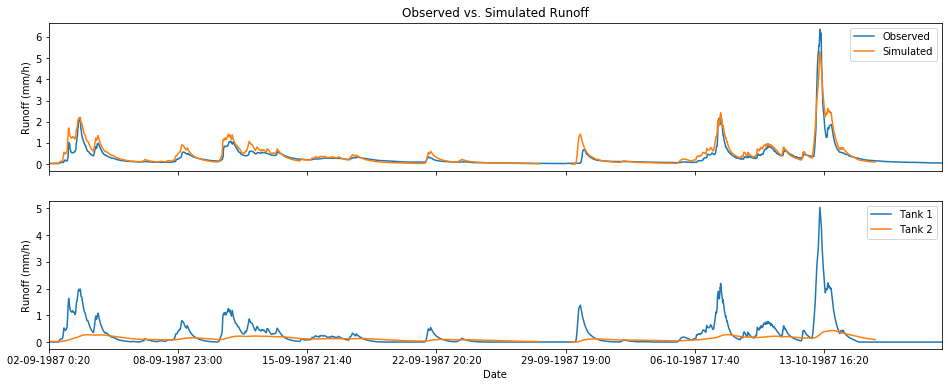

In [88]:
fig, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
df.plot('Date', 'Runoff (mm/h)', label='Observed', ax=ax[0], title='Observed vs. Simulated Runoff')
df.plot('Date', 'Q1+Q2 (mm/h)', label='Simulated', ax=ax[0])
df.plot('Date', 'Q1 (mm/h)', label='Tank 1', ax=ax[1])
df.plot('Date', 'Q2 (mm/h)', label='Tank 2', ax=ax[1])
ax[0].set_ylabel('Runoff (mm/h)')
ax[1].set_ylabel('Runoff (mm/h)')